In [99]:
import pandas as pd
import numpy as np

In [100]:
movie_df = pd.read_csv("movie_final_data.csv")
movie_df.head(3)

,Title,URL,Year,Duration,MPAA Rating,Rating,Vote Count,Genres,Directors,Writers,Stars
0,1. The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,1994,2h 22m,R,9.3,(3M),Epic | Period Drama | Prison Drama | Drama,Frank Darabont,Stephen King | Frank Darabont,Tim Robbins | Morgan Freeman | Bob Gunton
1,2. The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,2h 55m,R,9.2,(2.1M),Epic | Gangster | Tragedy | Crime | Drama,Francis Ford Coppola,Mario Puzo | Francis Ford Coppola,Marlon Brando | Al Pacino | James Caan
2,3. The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=cht...,2008,2h 32m,PG-13,9.0,(3M),Action Epic | Epic | Superhero | Action | Crim...,Christopher Nolan,Jonathan Nolan | Christopher Nolan | David S. ...,Christian Bale | Heath Ledger | Aaron Eckhart


In [101]:
# convert durration to mins 

In [102]:
def convert_to_minutes(duration):
    hours = 0
    minutes = 0

    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
        duration = duration.split('h')[1].strip() if 'm' in duration else ''

    if 'm' in duration:
        minutes = int(duration.replace('m', '').strip())

    return hours * 60 + minutes

movie_df['Duration (Mins)'] = movie_df['Duration'].apply(convert_to_minutes)
movie_df.head(2)

,Title,URL,Year,Duration,MPAA Rating,Rating,Vote Count,Genres,Directors,Writers,Stars,Duration (Mins)
0,1. The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,1994,2h 22m,R,9.3,(3M),Epic | Period Drama | Prison Drama | Drama,Frank Darabont,Stephen King | Frank Darabont,Tim Robbins | Morgan Freeman | Bob Gunton,142
1,2. The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,2h 55m,R,9.2,(2.1M),Epic | Gangster | Tragedy | Crime | Drama,Francis Ford Coppola,Mario Puzo | Francis Ford Coppola,Marlon Brando | Al Pacino | James Caan,175


In [103]:
# lable years into decades 

In [104]:
bins = list(range(1921, 2032, 10))  
labels = [f"{start}-{start+9}" for start in bins[:-1]]
labels[-1] = "2021-Present"  

# Create the Decade column
movie_df['Decade'] = pd.cut(movie_df['Year'], bins=bins, labels=labels, right=False)
movie_df.head(2)

,Title,URL,Year,Duration,MPAA Rating,Rating,Vote Count,Genres,Directors,Writers,Stars,Duration (Mins),Decade
0,1. The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,1994,2h 22m,R,9.3,(3M),Epic | Period Drama | Prison Drama | Drama,Frank Darabont,Stephen King | Frank Darabont,Tim Robbins | Morgan Freeman | Bob Gunton,142,1991-2000
1,2. The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,2h 55m,R,9.2,(2.1M),Epic | Gangster | Tragedy | Crime | Drama,Francis Ford Coppola,Mario Puzo | Francis Ford Coppola,Marlon Brando | Al Pacino | James Caan,175,1971-1980


In [105]:
# organised MPAA - handle outlier and missing value 

In [106]:
movie_df['MPAA Rating'] = movie_df['MPAA Rating'].replace(['NC-17', 'Not Rated', 'Approved', 'Passed', np.nan], 'UR')
movie_df['MPAA Rating'].value_counts()

R        101
UR        57
PG        39
PG-13     35
G         18
Name: MPAA Rating, dtype: int64

In [107]:
# convert vote count to same unit ( in mln )

In [108]:
def convert_to_millions(value):
    if pd.isna(value) or value in ["N/A", ""]:
        return None  # Handle missing or invalid values as None
    
    value = value.lower().replace(',', '').strip()  # Normalize case, remove commas, and trim spaces
    value = ''.join([char for char in value if char.isdigit() or char in ['.', 'm', 'k']])  # Remove unexpected characters

    if 'm' in value:
        return round(float(value.replace('m', '')), 2)  # Convert 'M' directly
    elif 'k' in value:
        return round(float(value.replace('k', '')) / 1000, 2)  # Convert 'K' to 'M'
    elif value.isdigit():
        return round(float(value) / 1_000_000, 2)  # Handle raw numbers
    else:
        return None  # Return None if conversion fails
    
# Apply function to column
movie_df['Vote Count (M)'] = movie_df['Vote Count'].apply(convert_to_millions)
movie_df.head(2)

,Title,URL,Year,Duration,MPAA Rating,Rating,Vote Count,Genres,Directors,Writers,Stars,Duration (Mins),Decade,Vote Count (M)
0,1. The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,1994,2h 22m,R,9.3,(3M),Epic | Period Drama | Prison Drama | Drama,Frank Darabont,Stephen King | Frank Darabont,Tim Robbins | Morgan Freeman | Bob Gunton,142,1991-2000,3.0
1,2. The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,2h 55m,R,9.2,(2.1M),Epic | Gangster | Tragedy | Crime | Drama,Francis Ford Coppola,Mario Puzo | Francis Ford Coppola,Marlon Brando | Al Pacino | James Caan,175,1971-1980,2.1


In [109]:
# remove s.no from movie title text using regex 

In [110]:
movie_df['Title'] = movie_df['Title'].str.replace(r'^\d+\.\s*', '', regex=True)
movie_df.head(2)

,Title,URL,Year,Duration,MPAA Rating,Rating,Vote Count,Genres,Directors,Writers,Stars,Duration (Mins),Decade,Vote Count (M)
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,1994,2h 22m,R,9.3,(3M),Epic | Period Drama | Prison Drama | Drama,Frank Darabont,Stephen King | Frank Darabont,Tim Robbins | Morgan Freeman | Bob Gunton,142,1991-2000,3.0
1,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,2h 55m,R,9.2,(2.1M),Epic | Gangster | Tragedy | Crime | Drama,Francis Ford Coppola,Mario Puzo | Francis Ford Coppola,Marlon Brando | Al Pacino | James Caan,175,1971-1980,2.1


In [111]:
# group similar genres to single category

In [112]:
genre_mapping = pd.read_csv('movie_genres_mapping.csv')

# Step 2: Create a dictionary for genre to category mapping
genre_to_category = dict(zip(genre_mapping['Genre'], genre_mapping['Category']))

# Step 3: Define a function to map genres to unique categories
def map_genres(genre_string):
    genre_list = genre_string.split(' | ')  # Assuming genres are separated by ' | '
    categories = set()  # Using a set to avoid duplicates
    
    # Loop through each genre and map it to the corresponding category
    for genre in genre_list:
        category = genre_to_category.get(genre)
        if category:
            categories.add(category)  # Add to the set (duplicates will be ignored)
    
    # Join the categories back into a string, separated by ' | '
    return ' | '.join(categories)

# Step 4: Apply the function to the 'Genres' column
movie_df['Genres Categories'] = movie_df['Genres'].apply(map_genres)

movie_df.head(2)

,Title,URL,Year,Duration,MPAA Rating,Rating,Vote Count,Genres,Directors,Writers,Stars,Duration (Mins),Decade,Vote Count (M),Genres Categories
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?ref_=cht...,1994,2h 22m,R,9.3,(3M),Epic | Period Drama | Prison Drama | Drama,Frank Darabont,Stephen King | Frank Darabont,Tim Robbins | Morgan Freeman | Bob Gunton,142,1991-2000,3.0,Drama
1,The Godfather,https://www.imdb.com/title/tt0068646/?ref_=cht...,1972,2h 55m,R,9.2,(2.1M),Epic | Gangster | Tragedy | Crime | Drama,Francis Ford Coppola,Mario Puzo | Francis Ford Coppola,Marlon Brando | Al Pacino | James Caan,175,1971-1980,2.1,Crime & Thriller | Drama


In [113]:
movie_df.columns

Index(['Title', 'URL', 'Year', 'Duration', 'MPAA Rating', 'Rating',
       'Vote Count', 'Genres', 'Directors', 'Writers', 'Stars',
       'Duration (Mins)', 'Decade', 'Vote Count (M)', 'Genres Categories'],
      dtype='object')

In [114]:
movie_df = movie_df[['Title', 'MPAA Rating', 'Rating',
                     'Duration (Mins)', 'Decade', 'Vote Count (M)', 'Genres Categories',
                     'Directors', 'Writers', 'Stars']]

movie_df.head(2)

,Title,MPAA Rating,Rating,Duration (Mins),Decade,Vote Count (M),Genres Categories,Directors,Writers,Stars
0,The Shawshank Redemption,R,9.3,142,1991-2000,3.0,Drama,Frank Darabont,Stephen King | Frank Darabont,Tim Robbins | Morgan Freeman | Bob Gunton
1,The Godfather,R,9.2,175,1971-1980,2.1,Crime & Thriller | Drama,Francis Ford Coppola,Mario Puzo | Francis Ford Coppola,Marlon Brando | Al Pacino | James Caan


In [115]:
movie_df.to_csv("movies_cleaned.csv",index=False)

In [116]:
# unique_genres = set(genre.strip() for genres in movie_df['Genres'].dropna() for genre in genres.split('|'))

In [117]:
# genre_category = {'Action',
#  'Adventure',
#  'Animation',
#  'Comedy',
#  'Crime & Thriller',
#  'Drama',
#  'Fantasy & Sci-Fi',
#  'Horror',
#  'Musical & Dance',
#  'Romance',
#  'Sports',
#  'Teen & Slice of Life',
#  'War & Western'}

# for i in cat:
#     print(i,movie_df[movie_df['Genres Categories'].str.contains(i, case=False, na=False)]['Title'].shape[0])

## Preprocessing: Convert |-separated columns to lists

In [118]:
df = movie_df.copy()

In [119]:
cols_to_split = ['Genres Categories', 'Directors', 'Writers', 'Stars']
for col in cols_to_split:
    df[col] = df[col].astype(str).apply(lambda x: x.split('|') if pd.notna(x) else [])
    
df['Genres Categories'] = df['Ge
                             nres Categories'].apply(lambda x: [s.strip() for s in x])
df['Directors'] = df['Directors'].apply(lambda x: [s.strip() for s in x])
df['Writers'] = df['Writers'].apply(lambda x: [s.strip() for s in x])
df['Stars'] = df['Stars'].apply(lambda x: [s.strip() for s in x])

df.head(2)

,Title,MPAA Rating,Rating,Duration (Mins),Decade,Vote Count (M),Genres Categories,Directors,Writers,Stars
0,The Shawshank Redemption,R,9.3,142,1991-2000,3.0,[Drama],[Frank Darabont],"[Stephen King, Frank Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton]"
1,The Godfather,R,9.2,175,1971-1980,2.1,"[Crime & Thriller, Drama]",[Francis Ford Coppola],"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan]"


## Identify Top-Rated Movies 

In [120]:
df['Weighted Score'] = df['Rating'] * df['Vote Count (M)']
top_movies = df[['Title', 'Rating', 'Vote Count (M)', 'Weighted Score']].sort_values(by='Weighted Score', ascending=False).head(10)

top_movies[['Title']].reset_index(drop=True)

,Title
0,The Shawshank Redemption
1,The Dark Knight
2,Inception
3,Fight Club
4,Pulp Fiction
5,Forrest Gump
6,Interstellar
7,The Godfather
8,The Lord of the Rings: The Return of the King
9,The Lord of the Rings: The Fellowship of the Ring


## Most Popular Directors, Actors, and Genres

In [121]:
# Explode the multi-value columns
df_exploded_directors = df.explode('Directors')
df_exploded_stars = df.explode('Stars')
df_exploded_genres = df.explode('Genres Categories')

In [122]:
# Top 10 most popular directors (who directed the most movies)
top_directors = df_exploded_directors['Directors'].value_counts().head(10)
top_directors

Christopher Nolan    8
Stanley Kubrick      7
Steven Spielberg     7
Martin Scorsese      7
Alfred Hitchcock     6
Akira Kurosawa       6
Quentin Tarantino    5
Billy Wilder         5
Charles Chaplin      5
Sergio Leone         4
Name: Directors, dtype: int64

In [123]:
# Top 5 most popular actors (who appeared in the most movies)
top_actors = df_exploded_stars['Stars'].value_counts().head(5)
top_actors

Robert De Niro       9
Harrison Ford        6
Leonardo DiCaprio    6
Tom Hanks            6
Charles Chaplin      5
Name: Stars, dtype: int64

In [124]:
# Top 5 most common genres
top_genres = df_exploded_genres['Genres Categories'].value_counts().head(5)
top_genres

Drama               195
Crime & Thriller     93
Adventure            65
Fantasy & Sci-Fi     62
Comedy               61
Name: Genres Categories, dtype: int64

## Statistical Analysis

In [125]:
# Mean Ratings by Genre
mean_rating_by_genre = df_exploded_genres.groupby('Genres Categories')['Rating'].mean().sort_values(ascending=False)
print(mean_rating_by_genre.head(10))

Genres Categories
Fantasy & Sci-Fi        8.354839
Action                  8.344643
Musical & Dance         8.318182
Drama                   8.317436
Crime & Thriller        8.316129
Adventure               8.315385
Teen & Slice of Life    8.300000
Horror                  8.300000
Romance                 8.282143
War & Western           8.280952
Name: Rating, dtype: float64


## Distribution of Movie Durations

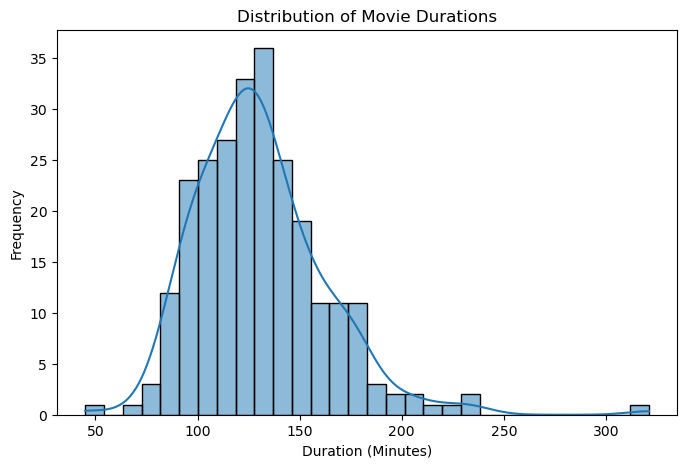

In [126]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Duration (Mins)'], bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

## Bar Chart: Top Directors by Number of Movies

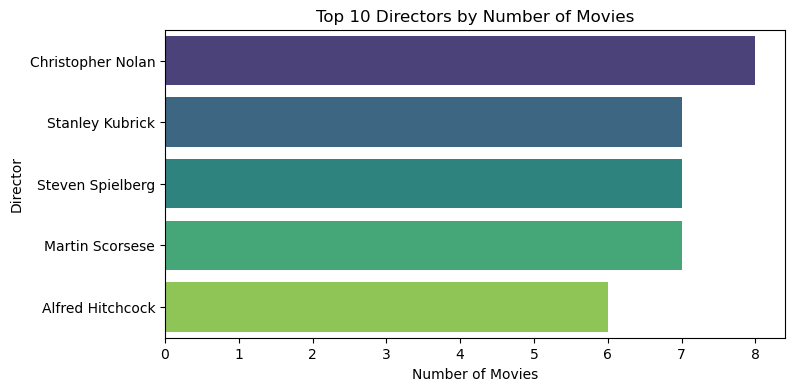

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explode directors into separate rows
df_directors = df.explode('Directors')

# Count movies per director
top_directors = df_directors['Directors'].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.title("Top 10 Directors by Number of Movies")
plt.show()

## Bar Chart: Top Actors by Number of Movies

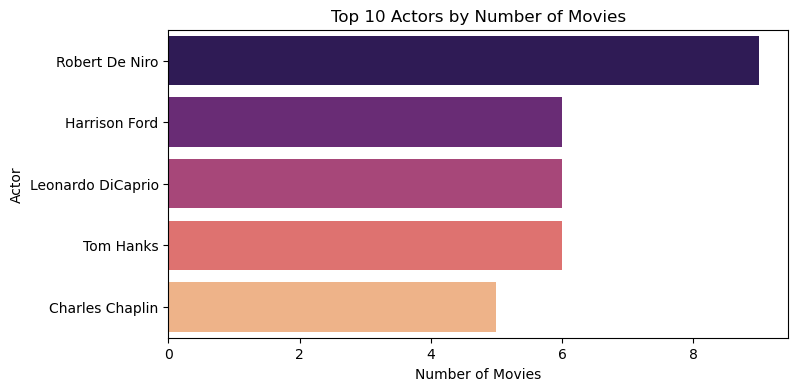

In [128]:
# Explode actors into separate rows
df_actors = df.explode('Stars')

# Count movies per actor
top_actors = df_actors['Stars'].value_counts().head(5)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='magma')
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("Top 10 Actors by Number of Movies")
plt.show()

## Pie Chart: Genre Distribution

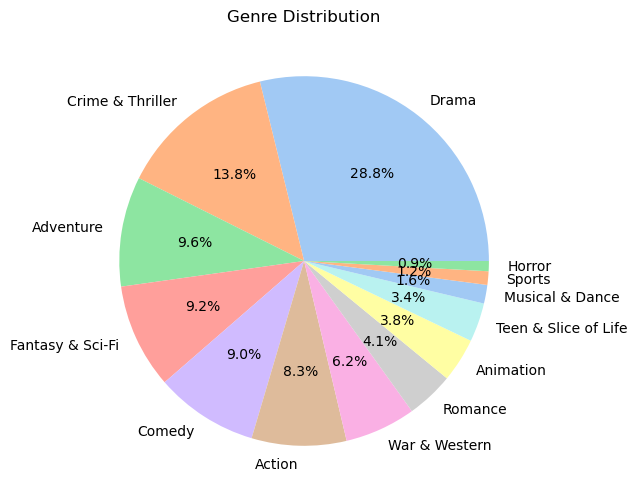

In [129]:
# Explode genres into separate rows
df_genres = df.explode('Genres Categories')

# Count occurrences of each genre
genre_counts = df_genres['Genres Categories'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(genre_counts)))
plt.title("Genre Distribution")
plt.show()

## Genre Trends Over Time

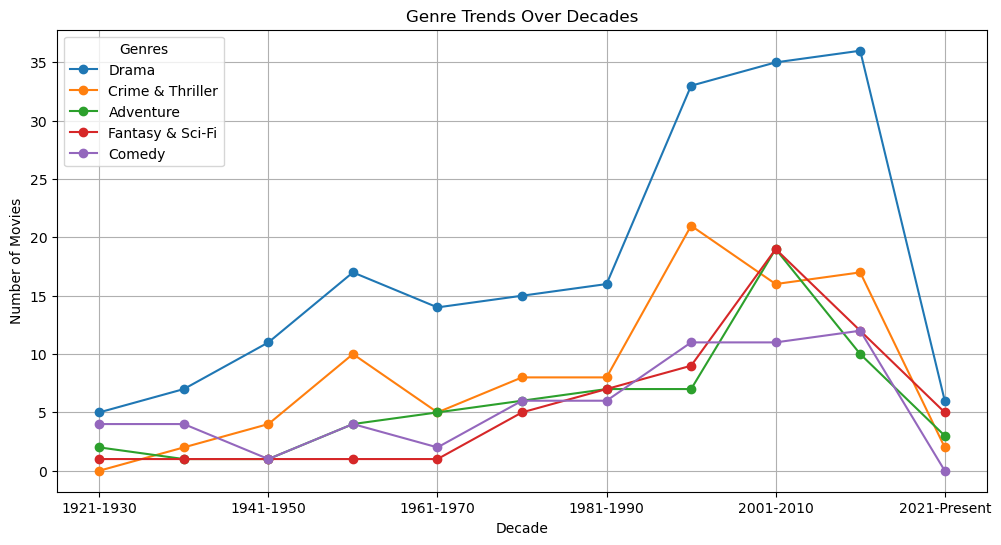

In [130]:
import matplotlib.pyplot as plt

# Count number of movies per genre per decade
genre_trends = df_exploded_genres.groupby(['Decade', 'Genres Categories']).size().unstack().fillna(0)

# Plot trends for the top genres
top_genres_list = top_genres.index  # Select top genres identified earlier
genre_trends[top_genres_list].plot(figsize=(12, 6), marker='o')

plt.title("Genre Trends Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.legend(title="Genres")
plt.grid()
plt.show()